In [1]:

import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import itertools


In [2]:
from backend.utils.utils import VelocityModel, auto_find_model_files


In [42]:
# Load the models
unit_override = None
vel_models_dir = "C:/Users/dkb73/Downloads/2d Plotting/S-Wave/AGA-Sept/AGA_Lucille_L1_16m_60channels_W-E/2D"
vel_models, unit_str = auto_find_model_files(vel_models_dir, unit_override=unit_override)
vel_models = vel_models[0:5]

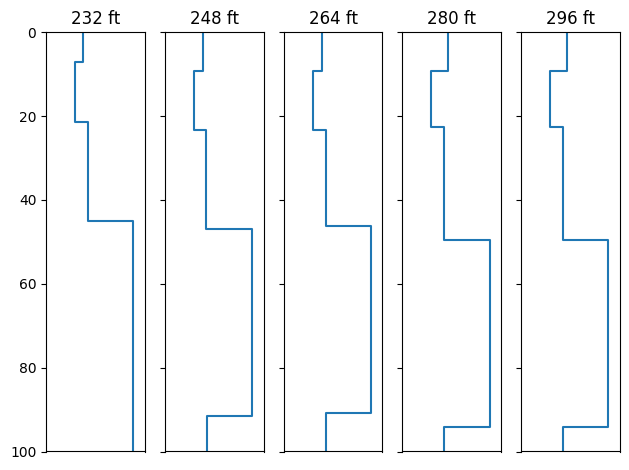

In [58]:
def plot_multi_vel_models(vel_models_list: list[VelocityModel]):
    num_vel_models = len(vel_models_list)

    # # Get min and max velocities in the models, to set x scale
    # mins = []
    # maxs = []
    # for vel_model in vel_models_list:
    #     mins.append(np.min(vel_model.df['Velocity'].to_numpy()))
    #     maxs.append(np.max(vel_model.df['Velocity'].to_numpy()))
    # min_x = np.min(mins)
    # max_x = np.max(maxs)
    # base_diff = max_x - min_x
    # min_x = min_x - base_diff/1.5
    # max_x = max_x + base_diff/5

    # Create plot with # subplots
    fig, axs = plt.subplots(1, num_vel_models, sharey=True)#, sharex=True)#, figsize=(num_vel_models*2, 10))
    for i in range(num_vel_models):
        ax = axs[i]
        plt.subplot(1, num_vel_models, i+1)
        vel_model = vel_models_list[i]
        x_vals = list(itertools.chain(*zip(vel_model.df['Start'].to_list(), vel_model.df['Stop'].to_list())))
        y_vals = list(itertools.chain(*zip(vel_model.df['Velocity'].to_list(), vel_model.df['Velocity'].to_list())))
        ax.set_title(str(vel_model.position) + " ft")
        ax.plot(y_vals, x_vals, )
        min_x = np.min(vel_model.df['Velocity'].to_numpy())
        max_x = np.max(vel_model.df['Velocity'].to_numpy())
        base_diff = max_x - min_x
        min_x = min_x - base_diff/2
        max_x = max_x + base_diff/5
        ax.set_xlim(min_x, max_x)
        ax.get_xaxis().set_visible(False)
    plt.ylim(0, 100)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
plot_multi_vel_models(vel_models)